In [1]:
import os
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
import numpy as np
from scipy.constants import c
import matplotlib.pyplot as plt
import legume
legume.set_backend('autograd')
import autograd.numpy as npa
import optomization
import json
from optomization.utils import NG
import matplotlib as mpl
import json

# Disable LaTeX but use Computer Modern fonts
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'cm'  # Use Computer Modern math fonts
mpl.rcParams['font.family'] = 'STIXGeneral'  # Use STIX fonts (similar to Computer Modern)

In [146]:
ks = np.linspace(.5*np.pi,np.pi,100)
phc = optomization.W1(NyChange=0)
gmeParams = {'verbose':True,'numeig':21,'compute_im':False,'gmode_inds':[0,2,4],'kpoints':np.vstack((ks,[0]*len(ks)))}
gme = legume.GuidedModeExp(phc,2.5)
gme.run(**gmeParams)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 347 plane waves and 3 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'        │ 15.588   │ │██------------------│   15% │
│ Inverse matrix of Fourier-space permittivity               │ 0.014    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver            │ 68.223   │ │████████████--------│   65% │
│ Creating GME matrix                                        │ 21.603   │ │████----------------│   20% │
├────────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 100 k-points   │ 105.580  │ │████████████████████│  100% │
└────────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

In [148]:
ngs = []
for i in range(len(ks)):
    ngs.append(NG(gme,i,20,Nx=100,Ny=125))

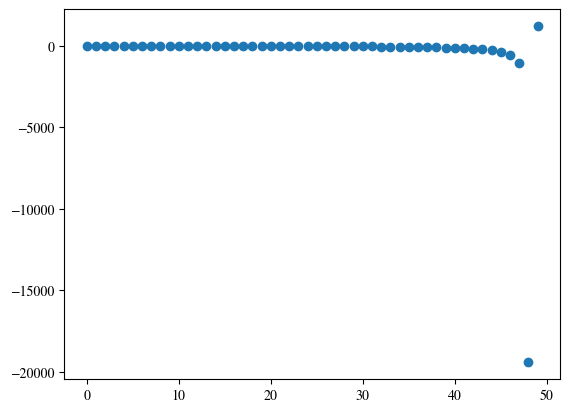

In [43]:
plt.plot(ngs,'o')
plt.show()


In [149]:
#make a table showing the k points next to their group index
import pandas as pd
print(pd.DataFrame(np.vstack((ks/2/np.pi,ngs,gme.freqs[:,20],gme.freqs[:,19])).T).to_markdown())

|    |        0 |            1 |        2 |        3 |
|---:|---------:|-------------:|---------:|---------:|
|  0 | 0.25     |     -3.49292 | 0.280768 | 0.245826 |
|  1 | 0.252525 |     -3.50773 | 0.280181 | 0.246058 |
|  2 | 0.255051 |     -3.52333 | 0.279595 | 0.246287 |
|  3 | 0.257576 |     -3.53979 | 0.279011 | 0.246512 |
|  4 | 0.260101 |     -3.55718 | 0.27843  | 0.246733 |
|  5 | 0.262626 |     -3.57557 | 0.277852 | 0.24695  |
|  6 | 0.265152 |     -3.59505 | 0.277276 | 0.247162 |
|  7 | 0.267677 |     -3.61573 | 0.276703 | 0.24737  |
|  8 | 0.270202 |     -3.63769 | 0.276133 | 0.247573 |
|  9 | 0.272727 |     -3.66107 | 0.275566 | 0.247771 |
| 10 | 0.275253 |     -3.686   | 0.275002 | 0.247964 |
| 11 | 0.277778 |     -3.71262 | 0.274442 | 0.24815  |
| 12 | 0.280303 |     -3.7411  | 0.273886 | 0.248331 |
| 13 | 0.282828 |     -3.77164 | 0.273334 | 0.248506 |
| 14 | 0.285354 |     -3.80443 | 0.272787 | 0.248675 |
| 15 | 0.287879 |     -3.83971 | 0.272244 | 0.248836 |
| 16 | 0.2

In [111]:
phc = optomization.W1(NyChange=0)
gmeParams = {'verbose':True,'numeig':21,'compute_im':False,'gmode_inds':[0,2,4],'kpoints':np.vstack(([2.0943951023931953],[0]))}
gme = legume.GuidedModeExp(phc,4)
gme.run(**gmeParams)

Plane waves used in the expansion = 835.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 835 plane waves and 3 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'        │ 0.302    │ │--------------------│    2% │
│ Inverse matrix of Fourier-space permittivity               │ 0.092    │ │--------------------│    1% │
│ Matrix diagionalization using the 'eigh' solver            │ 11.548   │ │█████████████████---│   88% │
│ Creating GME matrix                                        │ 1.106    │ │█-------------------│    8% │
├────────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 1 k-points     │ 13.051   │ │████████████████████│  100% │
└────────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

In [132]:
import json 

#import the data from a file and get the objective value
with open('/Users/dominic/Desktop/optGME/tests/media/ginds3/W1Best.json','r') as file:
    data = json.load(file)

mode = 20
intrest = gme.eigvecs[0][:,mode]
out=[]
freqs = []
ngs = []
for i in np.arange(100):
    print(i)
    phc_dropped = optomization.W1(vars=np.array(data[i]['x_values']))
    gmeParams_dropped = {'verbose':False,'numeig':30,'compute_im':False,'gmode_inds':[0,2,4],'kpoints':np.vstack(([2.0943951023931953],[0]))}
    gme_dropped = legume.GuidedModeExp(phc_dropped,4.00001)
    gme_dropped.run(**gmeParams_dropped)
    min_length = np.min([gme_dropped.eigvecs[0].shape[0],intrest.shape[0]])
    overlap = []
    for i in range(gme_dropped.eigvecs[0].shape[1]):
        overlap.append(np.abs(np.dot(intrest[:min_length],gme_dropped.eigvecs[0][:,i][:min_length])))
    interest = gme_dropped.eigvecs[0][:,np.argmax(overlap)]
    out.append(np.argmax(overlap))
    freqs.append(gme_dropped.freqs[0,out[-1]])
    ngs.append(NG(gme_dropped,0,out[-1],Nx=100,Ny=125))
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


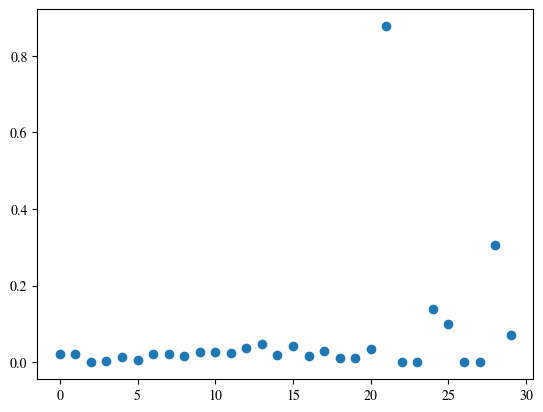

In [76]:
intrest = gme.eigvecs[0][:,20]
interest_mag = np.sum(np.abs(intrest))
overlap = []
for i in range(gme_dropped.eigvecs[0].shape[1]):
    overlap.append(np.abs(np.dot(intrest,gme_dropped.eigvecs[0][2:,i])))
plt.plot(overlap,'o')
plt.show()

In [72]:
print(np.argmax(overlap))

20


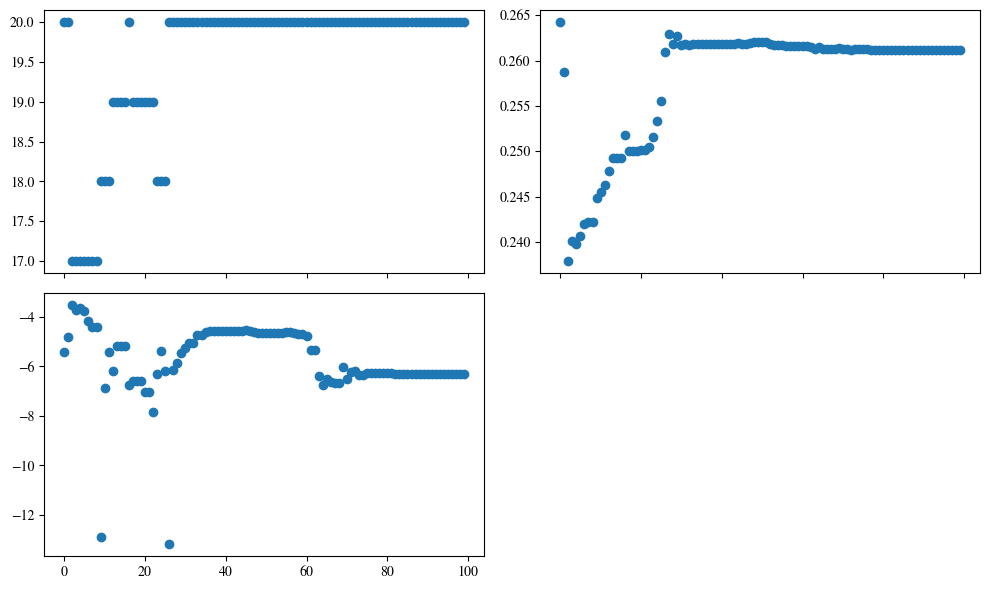

In [133]:
fig, axs = plt.subplots(2, 2, figsize=(10,6), sharex=True)
axs[0,0].plot(out, 'o')
axs[0,1].plot(freqs, 'o')
axs[1,0].plot(ngs, 'o')
axs[1,1].axis('off')
plt.tight_layout()
plt.show()

In [91]:
gme.eigvecs[0][:,20].shape

(2483,)

In [96]:
np.array(out).shape

(25, 30)

In [106]:
ks = np.linspace(.5*np.pi,np.pi,50)
phc_dropped2 = optomization.W1(vars=np.array(data[2]['x_values']))
gmeParams_dropped2 = {'verbose':False,'numeig':30,'compute_im':False,'gmode_inds':[0,2,4],'kpoints':np.vstack((ks,[0]*len(ks)))}
gme_dropped2 = legume.GuidedModeExp(phc_dropped,4.00001)
gme_dropped2.run(**gmeParams_dropped2)

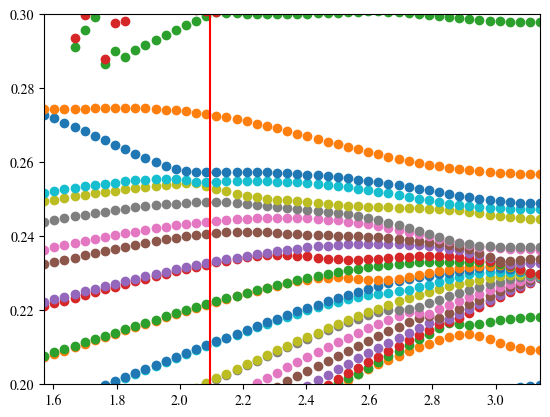

In [119]:
plt.plot(gme_dropped2.kpoints[0],gme_dropped2.freqs[:],'o')
plt.vlines(2.0943951023931953,0,1,color='r')
plt.xlim(np.pi*.5,np.pi)
plt.ylim(.2,.3)
plt.show()

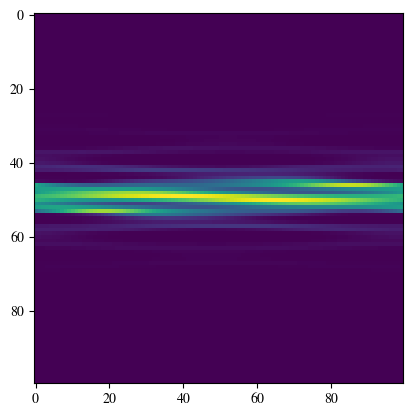

In [126]:
f,_,_ = gme_dropped2.get_field_xy('E',0,20,0,Nx=100,Ny=100)
E = np.abs(f['x'])**2+np.abs(f['y'])**2+np.abs(f['z'])**2
plt.imshow(E)

In [128]:
NG(gme_dropped2,0,20,Nx=100,Ny=125)

-7.0751667611895375

In [194]:
ks = np.linspace(.5*np.pi,np.pi,25)
variables = np.array([
               0.5166824289129854,
               0.001731244774175069,
               0.5309777999689471,
               0.43456102254125856,
               0.010589664904037096,
               0.4872342858373124,
               -2.630412735960326,
               -1.8137750172899516,
               -0.8475025491341768,
               0.8824203275421957,
               1.828496457631141,
               2.6627113268197085,
               0.332544118957724,
               0.37192349798302754,
               0.2963425556200359,
               0.3054514315956466,
               0.3295827162324826,
               0.35350581469342657

           ]
)
phc = optomization.W1(vars=variables)
gmeParams = {'verbose':True,'numeig':30,'compute_im':False,'gmode_inds':[0,2,4],'kpoints':np.vstack((ks,[0]*len(ks)))}
gme = legume.GuidedModeExp(phc,4.01)
gme.run(**gmeParams)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 855 plane waves and 3 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'        │ 7.469    │ │--------------------│    3% │
│ Inverse matrix of Fourier-space permittivity               │ 0.096    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver            │ 250.545  │ │█████████████████---│   89% │
│ Creating GME matrix                                        │ 24.765   │ │█-------------------│    9% │
├────────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 25 k-points    │ 282.932  │ │████████████████████│  100% │
└────────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

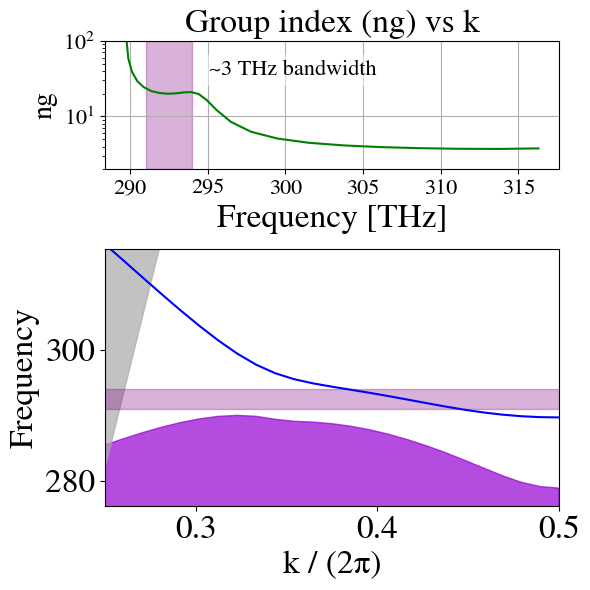

In [233]:
indices = [31,45,51,55]
index = indices[3]


fig, axs = plt.subplots(2, 1, figsize=(6, 6), gridspec_kw={'height_ratios': [1, 2]})

# First plot: ng vs k
conFac = 299792458/1E12/266E-9
freqs_thz = gme.freqs[:,20]*conFac
axs[0].plot(freqs_thz, np.abs(ngs), 'g')
axs[0].set_ylabel("ng", fontsize=20)
axs[0].set_title("Group index (ng) vs k", fontsize=24)
axs[0].tick_params(axis='both', which='major', labelsize=16)
axs[0].grid(True)
axs[0].set_yscale('log')
axs[0].set_ylim(2,100)
axs[0].set_xlabel("Frequency [THz]", fontsize=24)

# Add a gray shaded region in x (frequency) and annotate the bandwidth
band_start = 291
band_end = 294
axs[0].axvspan(band_start, band_end, color='purple', alpha=0.3)
axs[0].text((band_start + band_end)/2+8, 30, "~3 THz bandwidth", color='black', fontsize=16,
            ha='center', va='bottom', rotation=0, bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Second plot: frequency bands
axs[1].plot(gme.kpoints[0]/np.pi/2, gme.freqs[:,20]*conFac, 'b')
axs[1].plot(gme.kpoints[0]/np.pi/2, gme.freqs[:,21]*conFac, 'b--')
axs[1].fill_between(gme.kpoints[0]/np.pi/2, 0, gme.freqs[:,19]*conFac, color='darkviolet', alpha=0.7)
axs[1].fill_between(gme.kpoints[0]/np.pi/2, gme.kpoints[0]/np.pi/2*conFac, 1E120, color='darkgray', alpha=0.7)

axs[1].axhspan(band_start, band_end, color='purple', alpha=0.3)
axs[1].set_ylim(.245*conFac, .28*conFac)
axs[1].set_xlim(0.25, 0.5)
axs[1].set_xlabel("k / (2π)", fontsize=24)
axs[1].set_ylabel("Frequency", fontsize=24)
axs[1].tick_params(axis='both', which='major', labelsize=24)

plt.tight_layout()
plt.show()

In [197]:
ngs = []
for i in range(len(gme.freqs[:,0])):
    ngs.append(NG(gme,i,20))

# Creating New Plots for Review

In [13]:
#cell for creating simulation funcitons 
Nk = 100

def run_gme(variables):
    ks = np.linspace(.5*np.pi,np.pi,Nk)
    phc = optomization.W1(vars=variables)
    gmeParams = {'verbose':True,'numeig':30,'compute_im':False,'gmode_inds':[0,2,4],'kpoints':np.vstack((ks,[0]*len(ks)))}
    gme = legume.GuidedModeExp(phc,4.01)
    gme.run(**gmeParams)
    return phc, gme

#colorblind colors 
cs = {
    "b": "#5596E6",   # Soft blue
    "p": "#9855D4", # Mid-purple
    "m": "#E71D73",# Deep pink/magenta
    "o": "#FF6F00", # Vivid orange
    "y": "#FDD600"  # Bright yellow
}

In [3]:
# Import three specific files and store as data10, data15, data20 based on their file name
data10, data15, data20 = None, None, None
opt_dir = '/Users/dominic/Desktop/optGME/tests/media/review/opt'
for file in os.listdir(opt_dir):
    if file.endswith('.json'):
        with open(os.path.join(opt_dir, file), 'r') as f:
            if '10' in file:
                data10 = json.load(f)
            elif '15' in file:
                data15 = json.load(f)
            elif '20' in file:
                data20 = json.load(f)

In [4]:
phc10, gme10 = run_gme(np.array(data10[-1]['result']['x']))
phc15, gme15 = run_gme(np.array(data15[-1]['result']['x']))
phc20, gme20 = run_gme(np.array(data20[-1]['result']['x']))

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 855 plane waves and 3 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'        │ 29.124   │ │--------------------│    3% │
│ Inverse matrix of Fourier-space permittivity               │ 0.159    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver            │ 988.610  │ │█████████████████---│   88% │
│ Creating GME matrix                                        │ 102.656  │ │█-------------------│    9% │
├────────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 100 k-points   │ 1120.786 │ │████████████████████│  100% │
└────────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 855 plane waves and 3 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'        │ 29.012   │ │--------------------│    3% │
│ Inverse matrix of Fourier-space permittivity               │ 0.138    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver            │ 885.487  │ │█████████████████---│   87% │
│ Creating GME matrix                                        │ 98.013   │ │█-------------------│   10% │
├────────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 100 k-points   │ 1012.823 │ │████████████████████│  100% │
└────────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 855 plane waves and 3 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'        │ 29.160   │ │--------------------│    3% │
│ Inverse matrix of Fourier-space permittivity               │ 0.081    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver            │ 876.966  │ │█████████████████---│   87% │
│ Creating GME matrix                                        │ 100.074  │ │█-------------------│   10% │
├────────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 100 k-points   │ 1006.467 │ │████████████████████│  100% │
└────────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

In [5]:
ng10,ng15,ng20 = [],[],[]
for i in range(len(gme10.freqs[:,0])):
    ng10.append(NG(gme10,i,20))
    ng15.append(NG(gme15,i,20))
    ng20.append(NG(gme20,i,20))

ng10 = np.array(ng10)
ng15 = np.array(ng15)
ng20 = np.array(ng20)

In [8]:
alpha10,alpha15,alpha20 = [],[],[]
cost = optomization.Backscatter()
for i in range(len(gme10.freqs[:,0])):
    alpha10.append(10**cost.cost(gme10,phc10,20,k=i))
    alpha15.append(10**cost.cost(gme15,phc15,20,k=i))
    alpha20.append(10**cost.cost(gme20,phc20,20,k=i))

alpha10 = np.array(alpha10)
alpha15 = np.array(alpha15)
alpha20 = np.array(alpha20)

In [286]:
phcOG = optomization.W1(NyChange=0)
ks = np.linspace(.5*np.pi,np.pi,100)
gmeParamsOG = {'verbose':False,'numeig':30,'compute_im':False,'gmode_inds':[0,2,4],'kpoints':np.vstack((ks,[0]*len(ks)))}
gmeOG = legume.GuidedModeExp(phcOG,4.00001)
gmeOG.run(**gmeParamsOG)
print("running ng")

ngOG = []
for i in range(len(ks)):
    ngOG.append(NG(gmeOG,i,20))

ngOG = np.array(ngOG)
print("running alpha")

alphaOG = []
cost = optomization.Backscatter()
for i in range(len(ks)):
    alphaOG.append(10**cost.cost(gmeOG,phcOG,20,k=i))

alphaOG = np.array(alphaOG)

running ng
running alpha


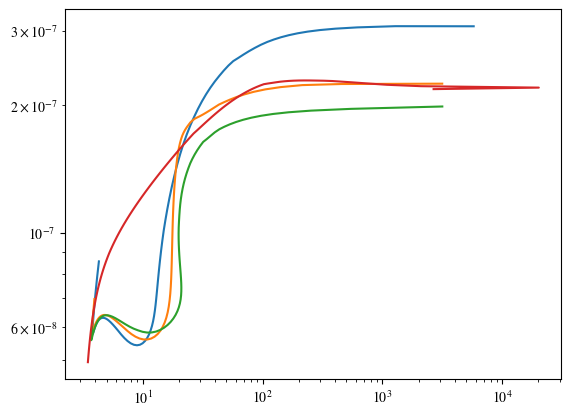

In [287]:
plt.plot(np.abs(ng10),alpha10)
plt.plot(np.abs(ng15),alpha15)
plt.plot(np.abs(ng20),alpha20)
plt.plot(np.abs(ngOG),alphaOG)
plt.xscale('log')
plt.yscale('log')
plt.show()
# %%

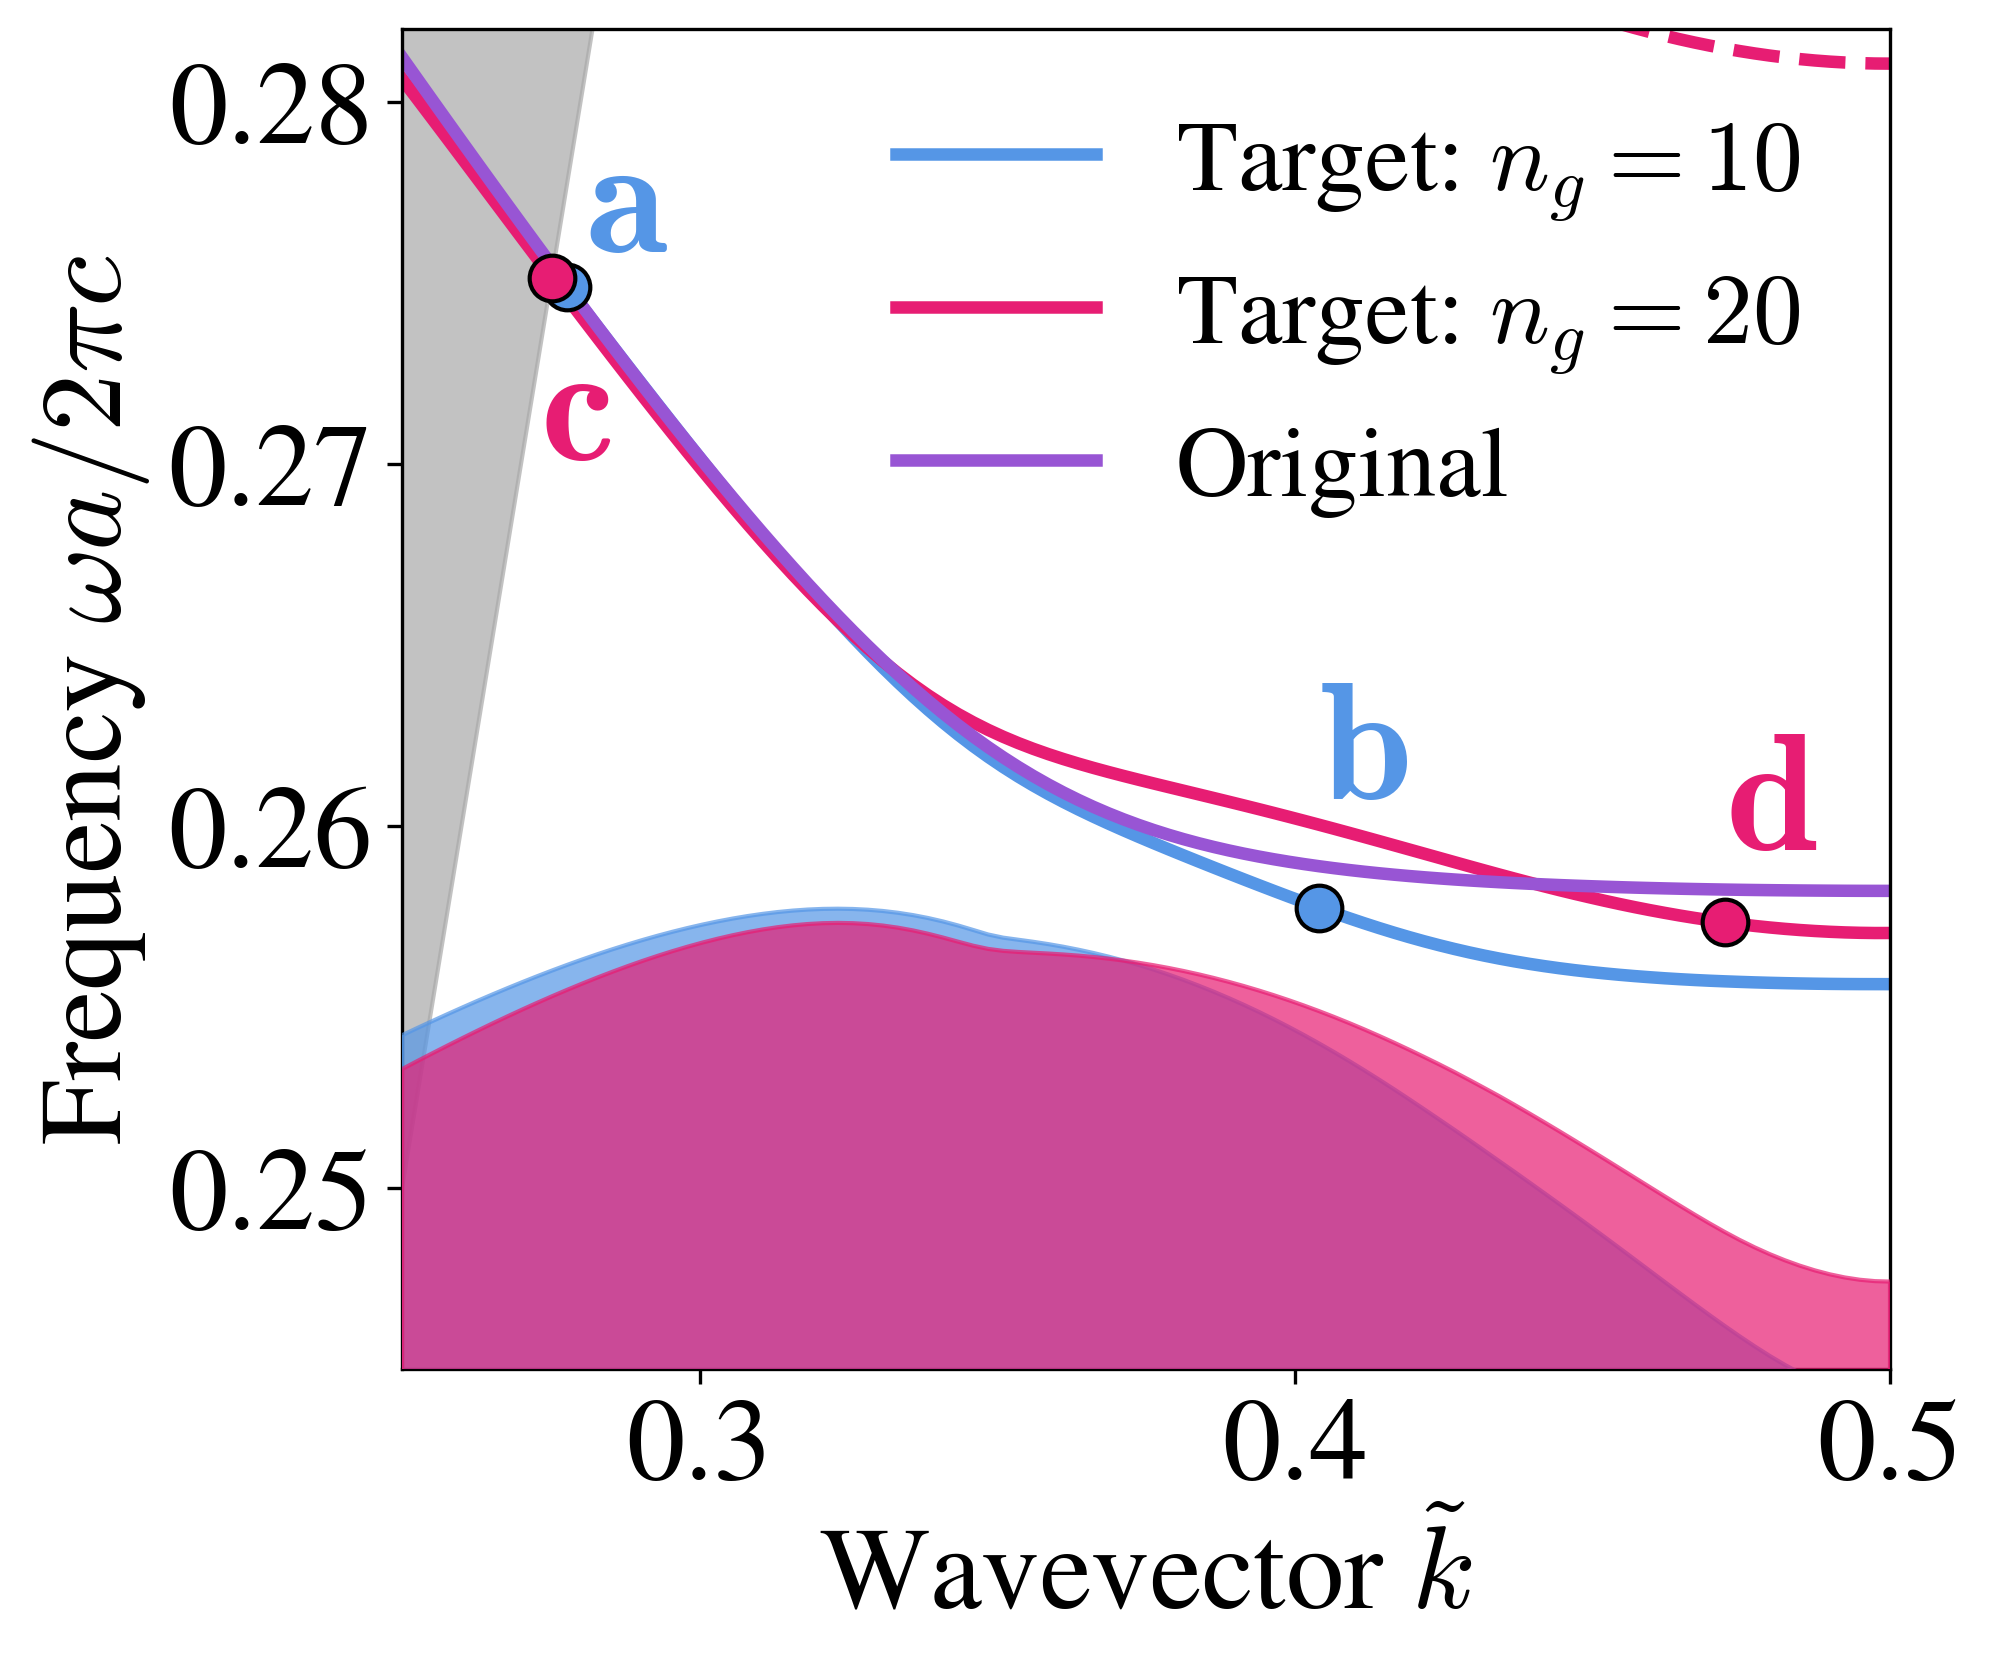

In [385]:
#constroling variables
c10 = cs['b']
c20 = cs['m']
lw = 3
axisTextSize = 28
labelTextSize = 34
annotationTextSize = 40
bandedge10 = [11,61]
bandedge20 = [10,88]
legendTextSize = 24

fig, ax = plt.subplots(figsize=(6.4, 5.8),dpi=300)

#light line
plt.fill_between(gme10.kpoints[0]/np.pi/2,gme10.kpoints[0]/np.pi/2,10,color='darkgray',alpha=0.7,zorder=0)

#bands of interest
plt.plot(gme10.kpoints[0]/np.pi/2,gme10.freqs[:,20],c10,linewidth=lw,zorder=1,label=r"Target: $n_g=10$")
plt.plot(gme20.kpoints[0]/np.pi/2,gme20.freqs[:,20],c20,linewidth=lw,zorder=1,label=r"Target: $n_g=20$")
plt.plot(gmeOG.kpoints[0]/np.pi/2,gmeOG.freqs[:,20],cs['p'],linewidth=lw,zorder=1,label=r"Original")

# #points at the edges of the band 
plt.scatter((gme10.kpoints[0]/np.pi/2)[bandedge10],gme10.freqs[bandedge10,20],color=c10,s=120,edgecolor='black',zorder=2)
plt.scatter((gme20.kpoints[0]/np.pi/2)[bandedge20],gme20.freqs[bandedge20,20],color=c20,s=120,edgecolor='black',zorder=2)

#higher order bands
plt.plot(gme10.kpoints[0]/np.pi/2,gme10.freqs[:,21],c10,linestyle='--',linewidth=lw,zorder=1)
plt.plot(gme20.kpoints[0]/np.pi/2,gme20.freqs[:,21],c20,linestyle='--',linewidth=lw,zorder=1)

#bulk
plt.fill_between(gme10.kpoints[0]/np.pi/2,gme10.freqs[:,19],0,color=c10,alpha=0.7,zorder=3)
plt.fill_between(gme20.kpoints[0]/np.pi/2,gme20.freqs[:,19],0,color=c20,alpha=0.7,zorder=3)

#add text labels for points 
plt.annotate(r'$\mathbf{a}$', ((gme10.kpoints[0]/np.pi/2)[bandedge10[0]]+.003, gme10.freqs[bandedge10[0],20]+.001), color=c10, fontsize=annotationTextSize)
plt.annotate(r'$\mathbf{b}$', ((gme10.kpoints[0]/np.pi/2)[bandedge10[1]], gme10.freqs[bandedge10[1],20]+.003), color=c10, fontsize=annotationTextSize)
plt.annotate(r'$\mathbf{c}$', ((gme20.kpoints[0]/np.pi/2)[bandedge20[0]]-.002, gme20.freqs[bandedge20[0],20]-.005), color=c20, fontsize=annotationTextSize)
plt.annotate(r'$\mathbf{d}$', ((gme20.kpoints[0]/np.pi/2)[bandedge20[1]], gme20.freqs[bandedge20[1],20]+.002), color=c20, fontsize=annotationTextSize)


# #show points at the kpoints that we were targeting 
# plt.scatter(gme10.kpoints[0,45]/np.pi/2,gme10.freqs[45,20],color=c10,s=200,edgecolor='black',zorder=2)
# plt.scatter(gme20.kpoints[0,55]/np.pi/2,gme20.freqs[55,20],color=c20,s=200,edgecolor='black',zorder=2)

#formatting
plt.xlim(0.25,0.5)
plt.ylim(0.245,0.282)
plt.xlabel(r'Wavevector $\tilde k$',fontsize=axisTextSize)
plt.ylabel(r'Frequency $\omega a / 2\pi c$',fontsize=axisTextSize)
plt.tick_params(axis='both', which='major', labelsize=axisTextSize)
ax.legend(fontsize=legendTextSize, frameon=False)
plt.show()
# %%


In [288]:
print("min Band10: ",np.where(gme10.freqs[:,20]>np.max(gme10.freqs[:,19]))[-1][-1])
print("min Band20: ",np.where(gme20.freqs[:,20]>np.max(gme20.freqs[:,19]))[-1][-1])
print("max Band10: ",np.where(gme10.freqs[:,20]<gme10.kpoints[0]/2/np.pi)[0][0])
print("max Band20: ",np.where(gme20.freqs[:,20]<gme20.kpoints[0]/2/np.pi)[0][0])
print("max BandOG: ",np.where(gmeOG.freqs[:,20]<gmeOG.kpoints[0]/2/np.pi)[0][0])
print("min BandOG: ",np.where(gmeOG.freqs[:,20]>np.max(gmeOG.freqs[:,19]))[-1][-1])


min Band10:  61
min Band20:  88
max Band10:  11
max Band20:  10
max BandOG:  11
min BandOG:  99


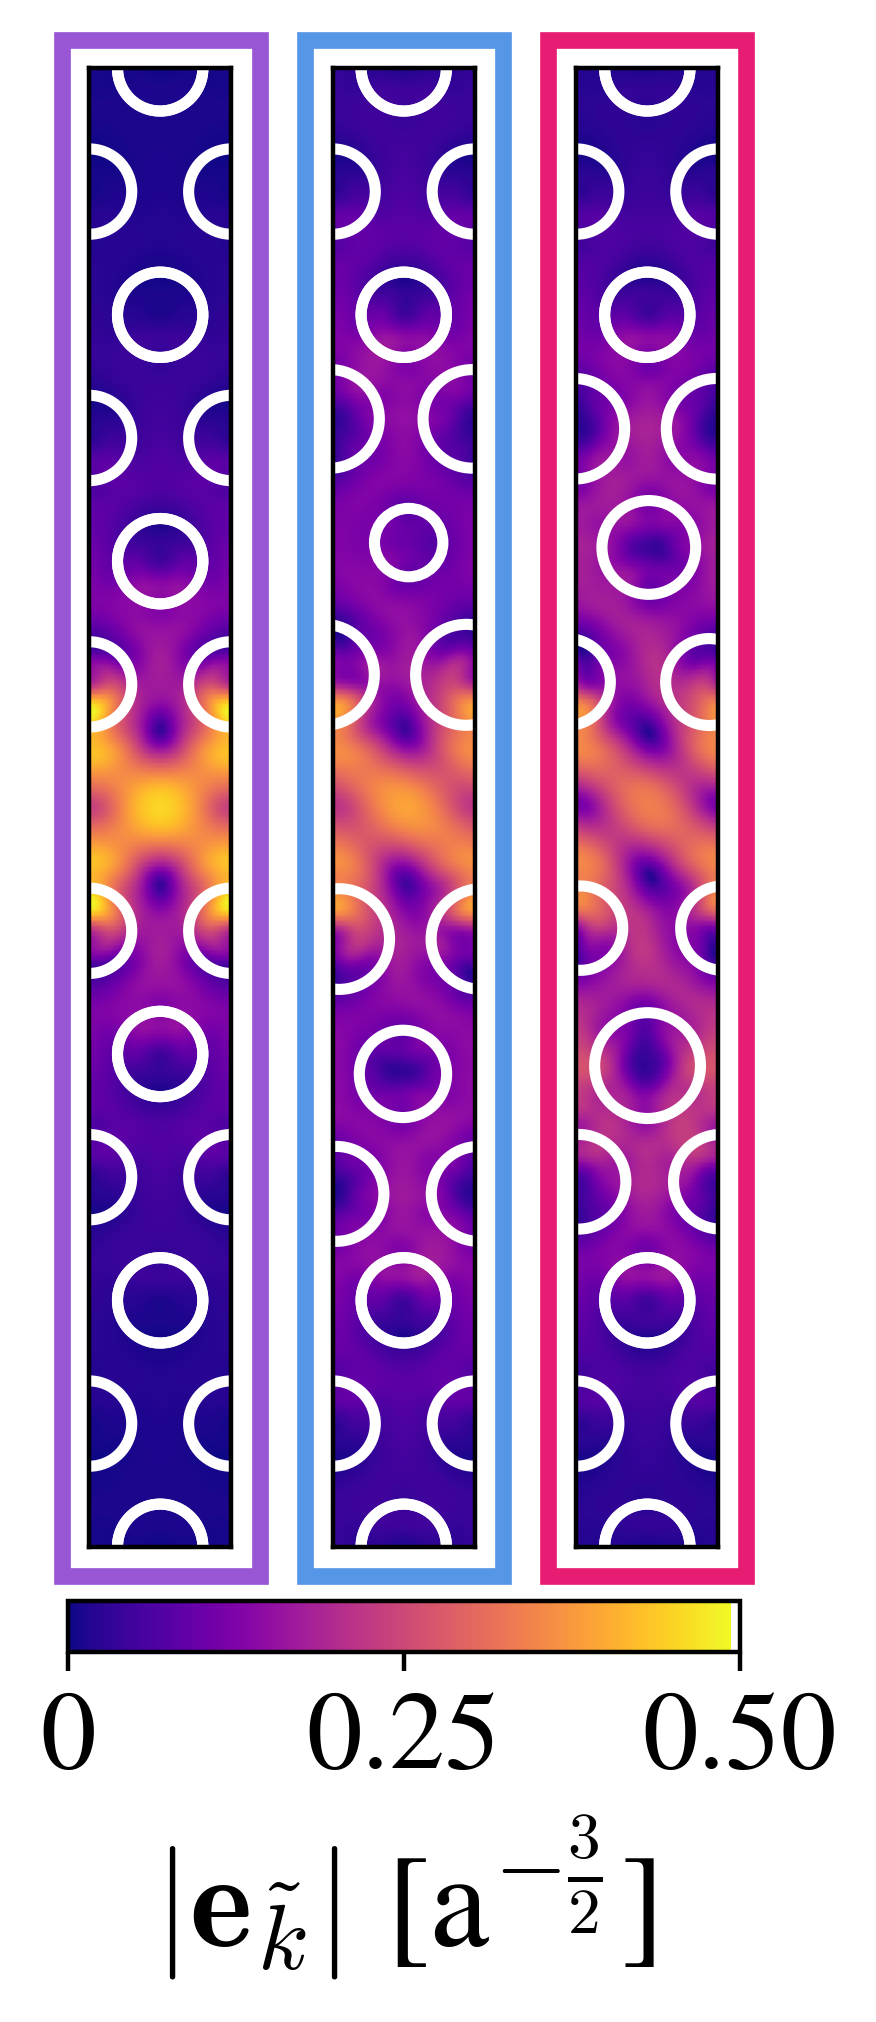

In [378]:
plt.rcParams['text.usetex'] = False
#control variables
colorbarLabelSize = 24
colorbarTickSize = 20
cmap = 'plasma'
c10 = cs['b']
c20 = cs['m']
kindex10 = 45
kindex20 = 55


# Set up variables used throughout
ylim = 12*np.sqrt(3)/2
ys = np.linspace(-ylim/2, ylim/2, 300)
mode = 20
z = phc10.layers[0].d/2

#Fields
# fields10, _, _ = gme10.get_field_xy('E', kindex10, mode, z, ygrid=ys, component='xyz')
# eabs10 = np.sqrt(np.abs(np.conj(fields10['x'])*fields10['x'] + np.conj(fields10['y'])*fields10['y'] + np.conj(fields10['z'])*fields10['z']))
# fields20, _, _ = gme20.get_field_xy('E', kindex20, mode, z, ygrid=ys, component='xyz')
# eabs20 = np.sqrt(np.abs(np.conj(fields20['x'])*fields20['x'] + np.conj(fields20['y'])*fields20['y'] + np.conj(fields20['z'])*fields20['z']))
# fieldsOG, _, _ = gmeOG.get_field_xy('E', kindex10, mode, z, ygrid=ys, component='xyz')
# eabsOG = np.sqrt(np.abs(np.conj(fieldsOG['x'])*fieldsOG['x'] + np.conj(fieldsOG['y'])*fieldsOG['y'] + np.conj(fieldsOG['z'])*fieldsOG['z']))
# maxF = np.max([np.max(eabs10), np.max(eabs20), np.max(eabsOG)])


# Create a figure with two subplots side by side, with reduced spacing to bring them closer together
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(3, 4.8), dpi=400)
fig.subplots_adjust(wspace=-.45)  # Reduce horizontal space between subplots

# Plot original field on left subplot (vertical orientation)
cax1 = ax1.imshow(eabsOG, extent=[-.5, .5, -ylim/2, ylim/2], cmap='plasma', vmax=maxF, vmin=0, zorder=1)
circles1 = [mpl.patches.Circle((s.x_cent, s.y_cent), s.r, edgecolor='white', facecolor='none', linewidth=2, zorder=2) for s in phcOG.layers[0].shapes]
cirlcesArround1 = [mpl.patches.Circle((0, 0), s.r, edgecolor='white', facecolor='none', linewidth=2, zorder=2) for s in phcOG.layers[0].shapes]
for c, ca in zip(circles1, cirlcesArround1):
    ax1.add_patch(c)
    ca.center = (c.center[0]-np.sign(c.center[0]), c.center[1])
    ax1.add_patch(ca)
ax1.set_xlim(-.5, .5)
ax1.set_ylim(-ylim/2, ylim/2)
ax1.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, 
labelbottom=False, labelleft=False)

# Plot optimized field on left subplot (vertical orientation)
cax2 = ax2.imshow(eabs10, extent=[-.5, .5, -ylim/2, ylim/2], cmap='plasma', vmax=maxF, vmin=0, zorder=1)
circles2 = [mpl.patches.Circle((s.x_cent, s.y_cent), s.r, edgecolor='white', facecolor='none', linewidth=2, zorder=2) for s in phc10.layers[0].shapes]
cirlcesArround2 = [mpl.patches.Circle((0, 0), s.r, edgecolor='white', facecolor='none', linewidth=2, zorder=2) for s in phc10.layers[0].shapes]
for c, ca in zip(circles2, cirlcesArround2):
    ax2.add_patch(c)
    ca.center = (c.center[0]-np.sign(c.center[0]), c.center[1])
    ax2.add_patch(ca)
ax2.set_xlim(-.5, .5)
ax2.set_ylim(-ylim/2, ylim/2)
ax2.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, 
labelbottom=False, labelleft=False)

# now for the 20ng field
cax3 = ax3.imshow(eabs20, extent=[-.5, .5, -ylim/2, ylim/2], cmap='plasma', vmax=maxF, vmin=0, zorder=1)
circles3 = [mpl.patches.Circle((s.x_cent, s.y_cent), s.r, edgecolor='white', facecolor='none', linewidth=2, zorder=2) for s in phc20.layers[0].shapes]
cirlcesArround3 = [mpl.patches.Circle((0, 0), s.r, edgecolor='white', facecolor='none', linewidth=2, zorder=2) for s in phc20.layers[0].shapes]
for c, ca in zip(circles3, cirlcesArround3):
    ax3.add_patch(c)
    ca.center = (c.center[0]-np.sign(c.center[0]), c.center[1])
    ax3.add_patch(ca)
ax3.set_xlim(-.5, .5)
ax3.set_ylim(-ylim/2, ylim/2)
ax3.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, 
labelbottom=False, labelleft=False)

# Hyperparameters to control box positioning and appearance
box_margin = 0.03
box_linewidth = 3
box_colors = [cs['p'], c10, c20] 

# Calculate box positions based on subplot layout
subplot_width = 0.105
subplot_spacing = 0.0975
box_height = 0.74
box_y_offset = 0.125
box_start = 0.2575

# Calculate x positions for each box
box_x_positions = [box_start, box_start + subplot_width + subplot_spacing, box_start + 2*subplot_width + 2*subplot_spacing]
for i, (x_pos, color) in enumerate(zip(box_x_positions, box_colors)):
    fig.add_artist(plt.Rectangle((x_pos - box_margin, box_y_offset - box_margin), 
    subplot_width + 2*box_margin, box_height + 2*box_margin,
    facecolor='none', edgecolor=color, 
    linewidth=box_linewidth, zorder=10))


# Add a horizontal colorbar at the bottom
cbar_ax = fig.add_axes([0.2325, 0.055, 0.56, 0.027]) # Position for horizontal colorbar at bottom
cbar = fig.colorbar(cax1, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=colorbarTickSize)
cbar.set_ticks([0, .25, .5])
cbar.ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: '0' if x == 0 else f'{x:.2f}'))
cbar.set_label(r"$|\mathbf{e}_{\tilde k}|$ [a$^{-\frac{3}{2}}$]", fontsize=colorbarLabelSize)
# Add a text annotation somewhere on the figure, not associated with the colorbar
plt.show()

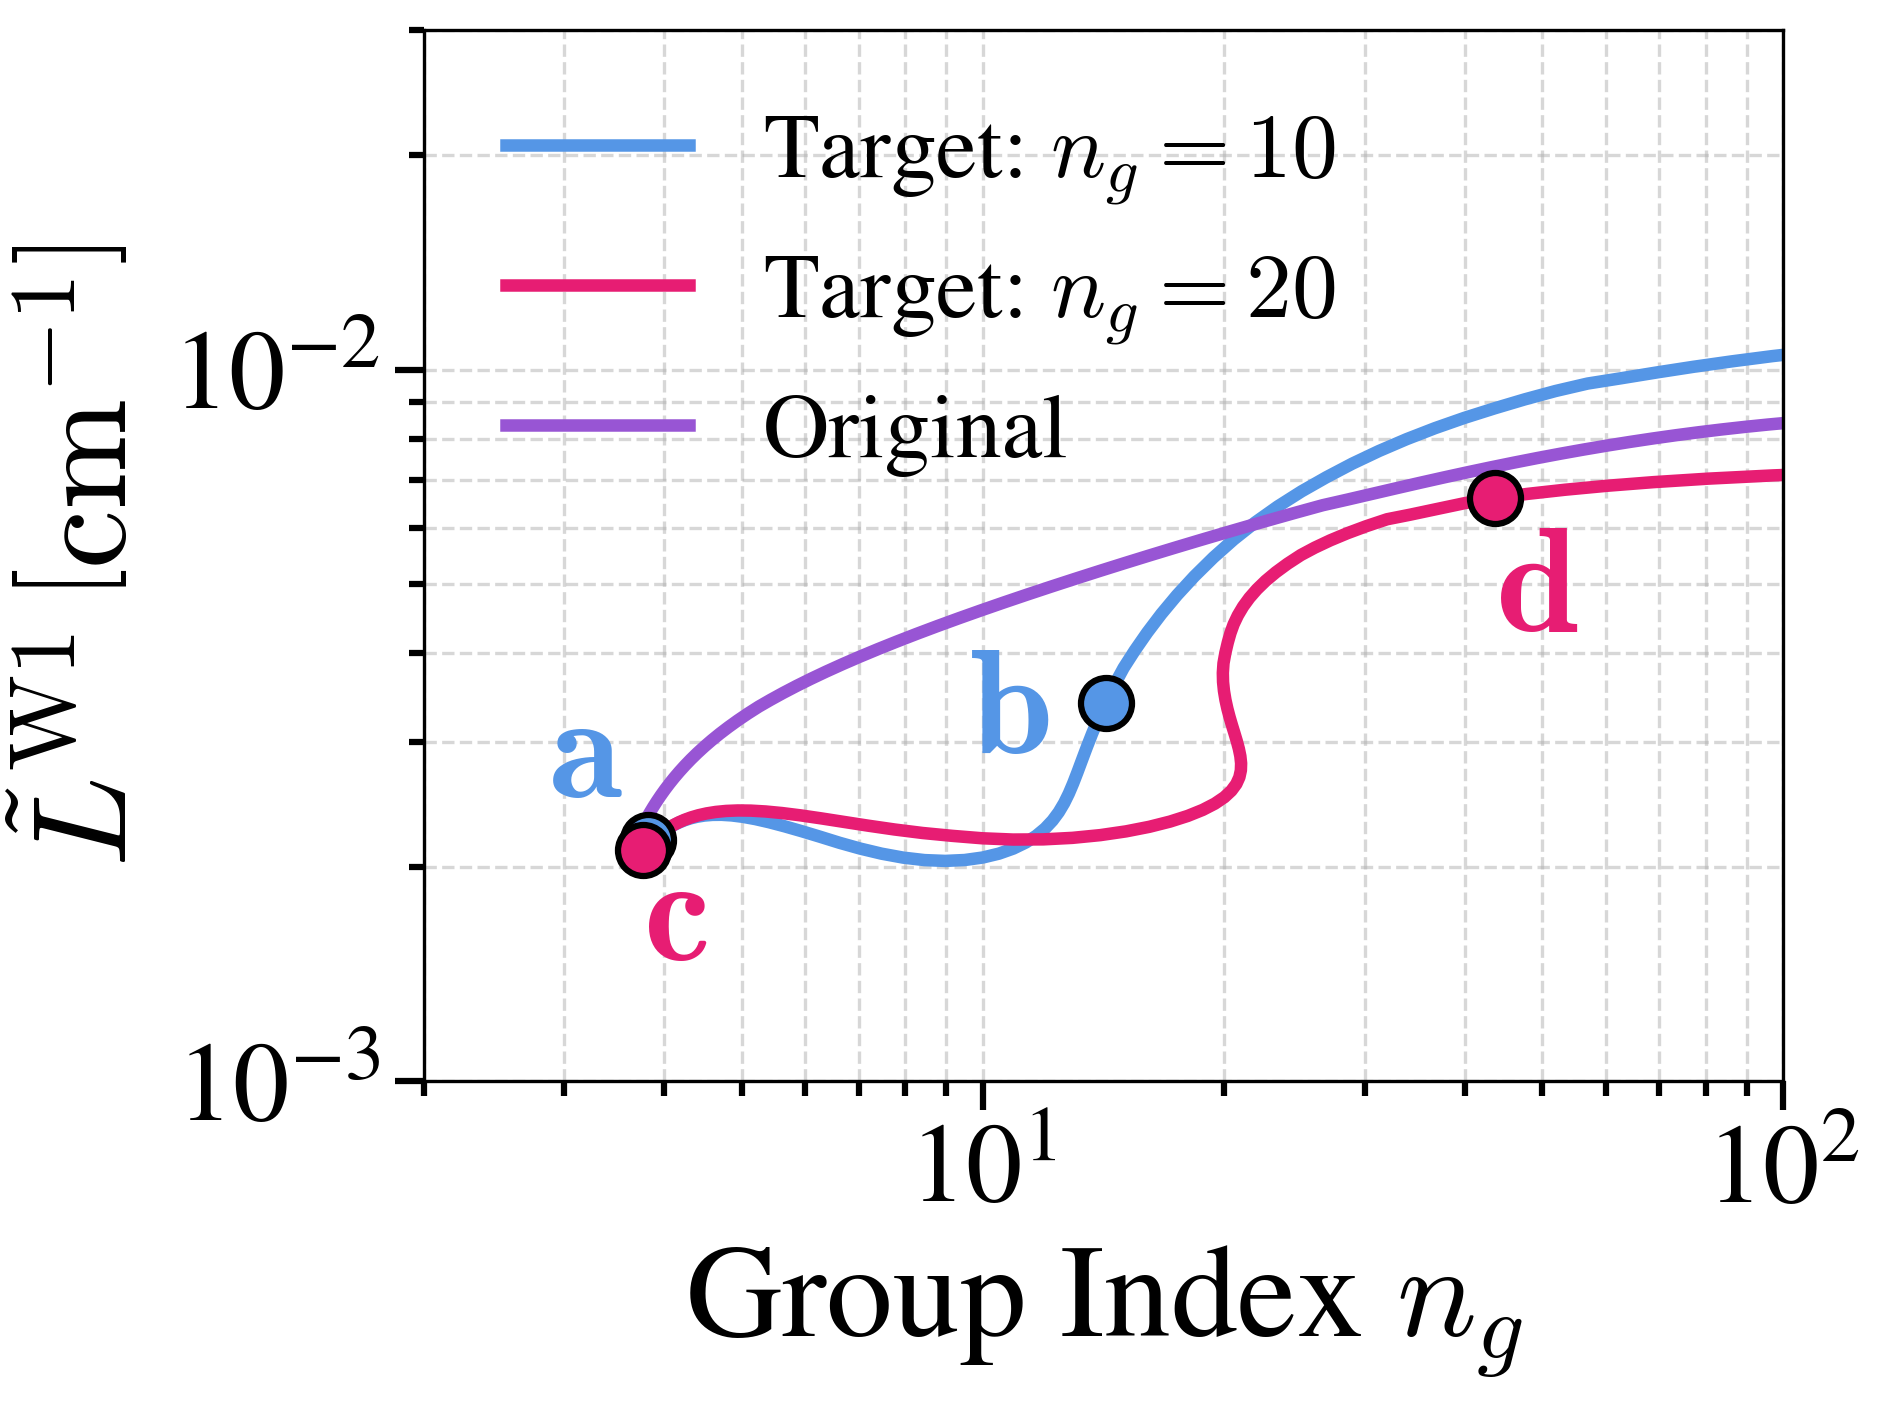

In [386]:
#define some hyperparameters
fig, ax = plt.subplots(dpi=300) 
legendTextSize = 22
annotationTextSize = 36
tickTextSize = 27
labelTextSize = 32
tickWidth = 1.5
tickLength = 7


#convert alphas to cm^-1
alphas10Converted = alpha10/266/1E-7
alphas20Converted = alpha20/266/1E-7
alphasOGConverted = alphaOG/266/1E-7

# Marked points
points10 = {r'$\mathbf{a}$': (np.abs(ng10[11]), alphas10Converted[11]), r'$\mathbf{b}$': (np.abs(ng10[61]), alphas10Converted[61])}
points20 = {r'$\mathbf{c}$': (np.abs(ng20[10]), alphas20Converted[10]), r'$\mathbf{d}$': (np.abs(ng20[88]), alphas20Converted[88])}

# Plot
ax.loglog(np.abs(ng10)[11:], alphas10Converted[11:], label=r'Target: $n_g=10$', color=c10, linewidth=3)
ax.loglog(np.abs(ng20)[10:], alphas20Converted[10:], label=r'Target: $n_g=20$', color=c20, linewidth=3)
ax.loglog(np.abs(ngOG)[11:], alphasOGConverted[11:], label=r'Original', color=cs['p'], linewidth=3)

# Plot each point and label individually

# # For points10
label_a, (x_a, y_a) = list(points10.items())[0]
ax.scatter(x_a, y_a, s=150, color=c10, edgecolor='black', linewidth=1.5, zorder=2)
ax.text(x_a*.75, y_a*1.15, label_a, fontsize=annotationTextSize, color=c10)

label_b, (x_b, y_b) = list(points10.items())[1]
ax.scatter(x_b, y_b, s=150, color=c10, edgecolor='black', linewidth=1.5, zorder=2)
ax.text(x_b*.675, y_b*.85, label_b, fontsize=annotationTextSize, color=c10)

# For points20
label_c, (x_c, y_c) = list(points20.items())[0]
ax.scatter(x_c, y_c, s=150, color=c20, edgecolor='black', linewidth=1.5, zorder=2)
ax.text(x_c, y_c*.7, label_c, fontsize=annotationTextSize, color=c20)

label_d, (x_d, y_d) = list(points20.items())[1]
ax.scatter(x_d, y_d, s=150, color=c20, edgecolor='black', linewidth=1.5, zorder=2)
ax.text(x_d, y_d*.65, label_d, fontsize=annotationTextSize, color=c20)


#plot the points we optimized at 
# plt.scatter(np.abs(ng10[45]),alphas10Converted[45],color=c10,s=150,edgecolor='black',zorder=2)
# plt.scatter(np.abs(ng20[55]),alphas20Converted[55],color=c20,s=150,edgecolor='black',zorder=2)

# Labels and legend
ax.set_xlabel(r'Group Index $n_g$', fontsize=labelTextSize)
ax.set_ylabel(r'$\tilde{L}^{\mathrm{W1}}\,\left[\mathrm{cm}^{-1}\right]$', fontsize=labelTextSize)
ax.legend(fontsize=legendTextSize, frameon=False)
ax.grid(True, which='both', ls='--', alpha=0.5)
plt.xlim(2,1E2)
plt.ylim(1E-3,3E-2)
plt.xticks(fontsize=tickTextSize)
plt.yticks(fontsize=tickTextSize)
ax.tick_params(axis='both', which='major', width=tickWidth, length=tickLength)
ax.tick_params(axis='both', which='minor', width=tickWidth, length=tickLength/2)
plt.tight_layout()
plt.show()

In [263]:
ks = npa.linspace(.5*np.pi,np.pi,100)
ks = npa.array([ks[45],ks[55]])

phc = optomization.W1(NyChange=0)
gmeParams = {'verbose':False,'numeig':30,'compute_im':False,'gmode_inds':[0,2,4],'kpoints':np.vstack((ks,[0]*len(ks)))}
gme = legume.GuidedModeExp(phc,4.00001)
gme.run(**gmeParams)

In [267]:
ngOG = []
for i in range(len(gme.freqs[:,0])):
    ngOG.append(NG(gme,i,20))

ngOG = np.array(ngOG)

In [265]:
alphaOG = []
cost = optomization.Backscatter()
for i in range(len(gme.freqs[:,0])):
    alphaOG.append(10**cost.cost(gme,phc,20,k=i))

alphaOG = np.array(alphaOG)

In [275]:
confac = 266*1E-7
print(np.abs(ngOG),alphaOG/confac)
print(np.abs(ng10[45]),alpha10[45]/confac)
print(np.abs(ng20[55]),alpha20[55]/confac)

[ 9.94046026 20.00233345] [0.00397321 0.00493619]
9.993036978719317 0.0020633671491798056
21.01821246175231 0.0027983601385728617
